In [1]:
import yfinance as yf
import datetime as dt
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib .pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

s1="BTC-USD"
s1_data=yf.download(s1,start="2021-06-01",end="2022-06-01")
s1_df=pd.DataFrame(s1_data)
s1_df.to_csv("s1_data.csv")

[*********************100%***********************]  1 of 1 completed


In [2]:
s1_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-31,35658.593750,37468.250000,34241.945312,37332.855469,37332.855469,39009847639
2021-06-01,37293.792969,37896.734375,35787.085938,36684.925781,36684.925781,34639423297
2021-06-02,36699.921875,38231.339844,35966.308594,37575.179688,37575.179688,33070867190
2021-06-03,37599.410156,39478.953125,37243.972656,39208.765625,39208.765625,35460750427
2021-06-04,39242.484375,39242.484375,35717.722656,36894.406250,36894.406250,41831090187
...,...,...,...,...,...,...
2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409


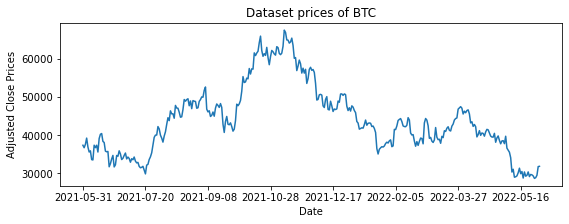

In [3]:
read_df=pd.read_csv("s1_data.csv")
read_df.set_index("Date",inplace=True)
plt.figure(figsize=(9,3))
read_df['Adj Close'].plot()
plt.title('Dataset prices of BTC')
plt.ylabel("Adjusted Close Prices")
plt.show()

In [4]:
df = pd.read_csv("s1_data.csv")
df.set_index("Date", inplace=True)
df.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-31,35658.593750,37468.250000,34241.945312,37332.855469,37332.855469,39009847639
2021-06-01,37293.792969,37896.734375,35787.085938,36684.925781,36684.925781,34639423297
2021-06-02,36699.921875,38231.339844,35966.308594,37575.179688,37575.179688,33070867190
2021-06-03,37599.410156,39478.953125,37243.972656,39208.765625,39208.765625,35460750427
2021-06-04,39242.484375,39242.484375,35717.722656,36894.406250,36894.406250,41831090187
...,...,...,...,...,...,...
2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409


In [5]:
x = df.iloc[:, 0:5].values # open, high, low, close, adj-close
y = df.iloc[:, 4].values #adj-close
#there are five features we will need. 

In [6]:
x.shape# the length of the array
y.shape

(366,)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=100)
# Split arrays and matrices into random train and test subsets.
# The test_size represents the proportion of the dataset to include in the test split.Here we use 0.3

In [8]:
#Random Forest

In [9]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=2, max_features=4, random_state=10)
rf_model.fit(x_train, y_train)
predict_rf = rf_model.predict(x_test)

In [10]:
#RF accuracy
print("Accuracy Evaluation")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict_rf), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict_rf), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict_rf)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict_rf), 4))
print(f'Train Score : {rf_model.score(x_train, y_train) * 100:.2f}% and Test Score : {rf_model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict_rf - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 4), '%.') 

Accuracy Evaluation
Mean Absolute Error: 1597.4954
Mean Squared Error: 4399549.6796
Root Mean Squared Error: 2097.5104
(R^2) Score: 0.9528
Train Score : 95.92% and Test Score : 95.28% using Random Tree Regressor.
Accuracy: 96.3678 %.


In [21]:
#SVM
from sklearn import svm

svm_clf = svm.SVC(probability=True)
svm_clf.fit(x, y.astype('int'))
predict_svm = svm_clf.predict(x_test)


In [22]:
print("SVM")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict_svm), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict_svm), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict_svm)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict_svm), 4))
svm_errors = abs(predict_svm - y_test)
svm_mape = 100 * (svm_errors / y_test)
accuracy = 100 - np.mean(svm_mape)
print('Accuracy:', round(accuracy, 4), '%.') 

SVM
Mean Absolute Error: 2007.0883
Mean Squared Error: 9520381.1614
Root Mean Squared Error: 3085.5115
(R^2) Score: 0.8979
Accuracy: 95.1878 %.


In [23]:
#LR model
y_train=y_train.astype('int')#change train dataset into integers
x_train=x_train.astype('int')#change train dataset into integers


In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)
predict_lr=lr.predict(x_test)
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))


multiclass


In [25]:
print("Logistic Regression")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict_lr), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict_lr), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict_lr)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict_lr), 4))
errors = abs(predict_lr - y_test)
mape = 100* (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 4),'%') 

Logistic Regression
Mean Absolute Error: 12822.7765
Mean Squared Error: 236969929.52
Root Mean Squared Error: 15393.8276
(R^2) Score: -1.541
Accuracy: 67.6271 %


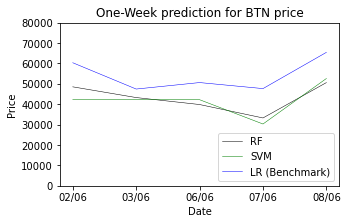

In [26]:
#BTD-1-week comparison,there are five trading days in one week.
predict_rf_oneweek=predict_rf[:5]
predict_svm_oneweek=predict_svm[:5]
predict_lr_oneweek=predict_lr[:5]
plt.figure(figsize=(5,3))
x=np.arange(5)
plt.ylim([0,80000])
plt.plot(x, predict_rf_oneweek,color='black',linewidth=0.5)
plt.plot(x,predict_svm_oneweek,color='green',linewidth=0.5)
plt.plot(x,predict_lr_oneweek,color='blue',linewidth=0.5)
plt.legend(['RF','SVM','LR (Benchmark)'],loc='lower right')
plt.title('One-Week prediction for BTN price')
x_ticks=np.arange(0,5,1)
plt.xticks(x_ticks)
index_ls=['02/06','03/06','06/06','07/06','08/06']
plt.xticks(x,index_ls)
plt.xlabel("Date")
plt.ylabel("Price")

plt.show()

In [27]:
#one-week accuracy
print('one-week')
y_test1=y_test[:5]
print('LR')
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test1, predict_lr_oneweek)), 2))
print("(R^2) Score:", round(metrics.r2_score(y_test1, predict_lr_oneweek), 2))
errors = abs(predict_lr_oneweek - y_test1)
mape = 100* (errors / y_test1)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%') 

print('RF')
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test1, predict_rf_oneweek)), 2))
print("(R^2) Score:", round(metrics.r2_score(y_test1, predict_rf_oneweek), 2))
errors = abs(predict_rf_oneweek - y_test1)
mape = 100* (errors / y_test1)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%') 

print('SVM')
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test1, predict_svm_oneweek)), 2))
print("(R^2) Score:", round(metrics.r2_score(y_test1, predict_svm_oneweek), 2))
errors = abs(predict_svm_oneweek - y_test1)
mape = 100* (errors / y_test1)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%') 

one-week
LR
RMSE: 12085.41
(R^2) Score: -1.31
Accuracy: 72.17 %
RF
RMSE: 1902.22
(R^2) Score: 0.94
Accuracy: 95.61 %
SVM
RMSE: 3762.64
(R^2) Score: 0.78
Accuracy: 94.08 %


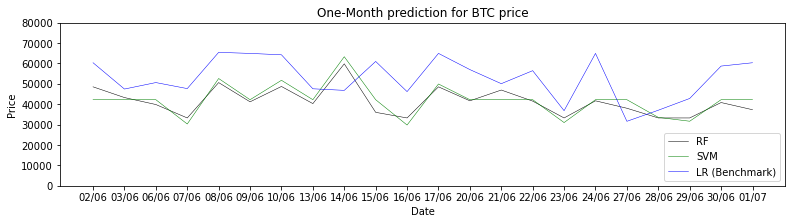

In [28]:
#BTD-1-month comparison,there are 22 trading days in one month.
predict_rf_onemonth=predict_rf[:22]
predict_svm_onemonth=predict_svm[:22]
predict_lr_onemonth=predict_lr[:22]
plt.figure(figsize=(13,3))
x=np.arange(0,22,1)
plt.ylim([0,80000])
plt.plot(x, predict_rf_onemonth,color='black',linewidth=0.5)
plt.plot(x,predict_svm_onemonth,color='green',linewidth=0.5)
plt.plot(x,predict_lr_onemonth,color='blue',linewidth=0.5)
plt.legend(['RF','SVM','LR (Benchmark)'],loc='lower right')
plt.title('One-Month prediction for BTC price')
x_ticks=np.arange(0,22,1)
plt.xticks(x_ticks)
index_ls=['02/06','03/06','06/06','07/06','08/06','09/06','10/06','13/06','14/06','15/06','16/06','17/06','20/06','21/06','22/06','23/06','24/06','27/06','28/06','29/06','30/06','01/07']

plt.xticks(x,index_ls)
plt.xlabel("Date")
plt.ylabel("Price")

plt.show()




In [29]:
#one-month accuracy
print('one-month')
y_test2=y_test[:22]
print('LR')
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test2, predict_lr_onemonth)), 2))
print("(R^2) Score:", round(metrics.r2_score(y_test2, predict_lr_onemonth), 2))
errors = abs(predict_lr_onemonth - y_test2)
mape = 100* (errors / y_test2)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%') 

print('RF')
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test2, predict_rf_onemonth)), 2))
print("(R^2) Score:", round(metrics.r2_score(y_test2, predict_rf_onemonth), 2))
errors = abs(predict_rf_onemonth - y_test2)
mape = 100* (errors / y_test2)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%') 

print('SVM')
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test2, predict_svm_onemonth)), 2))
print("(R^2) Score:", round(metrics.r2_score(y_test2, predict_svm_onemonth), 2))
errors = abs(predict_svm_onemonth - y_test2)
mape = 100* (errors / y_test2)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%') 

one-month
LR
RMSE: 14912.81
(R^2) Score: -2.26
Accuracy: 66.58 %
RF
RMSE: 1838.94
(R^2) Score: 0.95
Accuracy: 96.13 %
SVM
RMSE: 3009.19
(R^2) Score: 0.87
Accuracy: 95.09 %


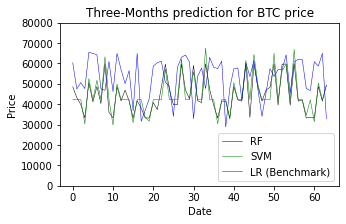

In [30]:
#BTD-3-month comparison,there are 64 trading days in three months.
predict_rf_threemonth=predict_rf[:64]
predict_svm_threemonth=predict_svm[:64]
predict_lr_threemonth=predict_lr[:64]
plt.figure(figsize=(5,3))
x=np.arange(0,64,1)
plt.ylim([0,80000])
plt.plot(x, predict_rf_threemonth,color='black',linewidth=0.5)
plt.plot(x,predict_svm_threemonth,color='green',linewidth=0.5)
plt.plot(x,predict_lr_threemonth,color='blue',linewidth=0.5)
plt.legend(['RF','SVM','LR (Benchmark)'],loc='lower right')
plt.title('Three-Months prediction for BTC price')
plt.xlabel("Date")
plt.ylabel("Price")

plt.show()

In [31]:
#Three-month accuracy
print('Three-Month')
y_test3=y_test[:64]
print('LR')
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test3, predict_lr_threemonth)), 2))
print("(R^2) Score:", round(metrics.r2_score(y_test3, predict_lr_threemonth), 2))
errors = abs(predict_lr_threemonth - y_test3)
mape = 100* (errors / y_test3)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%') 

print('RF')
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test3, predict_rf_threemonth)), 2))
print("(R^2) Score:", round(metrics.r2_score(y_test3, predict_rf_threemonth), 2))
errors = abs(predict_rf_threemonth - y_test3)
mape = 100* (errors / y_test3)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%') 

print('SVM')
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test3, predict_svm_threemonth)), 2))
print("(R^2) Score:", round(metrics.r2_score(y_test3, predict_svm_threemonth), 2))
errors = abs(predict_svm_threemonth - y_test3)
mape = 100* (errors / y_test3)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%') 

Three-Month
LR
RMSE: 14530.18
(R^2) Score: -1.24
Accuracy: 69.52 %
RF
RMSE: 2299.41
(R^2) Score: 0.94
Accuracy: 96.11 %
SVM
RMSE: 3047.61
(R^2) Score: 0.9
Accuracy: 95.23 %


In [36]:
predictions = pd.DataFrame({"Predictions": predict_svm}, index=pd.date_range(start=df.index[-1], periods=len(predict_svm), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
threemonth_df = pd.DataFrame(predictions[:63])
threemonth_df.to_csv("three-month-predictions.csv")
threemonth_df_pred = pd.read_csv("three-month-predictions.csv")
buy_price = min(threemonth_df_pred["Predictions"])
sell_price = max(threemonth_df_pred["Predictions"])
threemonth_buy = threemonth_df_pred.loc[threemonth_df_pred["Predictions"] == buy_price]
threemonth_sell = threemonth_df_pred.loc[threemonth_df_pred["Predictions"] == sell_price]
print("Investment Strategy for next 3 months")
print("Buy price and date")
print(threemonth_buy)
print("Sell price and date")
print(threemonth_sell)

Investment Strategy for next 3 months
Buy price and date
    Unnamed: 0  Predictions
10  2022-06-10        29807
Sell price and date
    Unnamed: 0  Predictions
33  2022-07-03        67566


In [33]:
predictions = pd.DataFrame({"Predictions": predict_svm}, index=pd.date_range(start=df.index[-1], periods=len(predict_svm), freq="D"))

predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values

onemonth_df = pd.DataFrame(predictions[:22])
onemonth_df.to_csv("one-month-predictions.csv")


onemonth_df_pred = pd.read_csv("one-month-predictions.csv")

buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Investment Strategy for next 1 month")
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)

Investment Strategy for next 1 month
Buy price and date
    Unnamed: 0  Predictions
10  2022-06-10        29807
Sell price and date
   Unnamed: 0  Predictions
8  2022-06-08        63326


In [34]:
predictions = pd.DataFrame({"Predictions": predict_svm}, index=pd.date_range(start=df.index[-1], periods=len(predict_svm), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneweek_df = pd.DataFrame(predictions[:5])
oneweek_df.to_csv("oneweek-predictions.csv")
oneweek_df_pred = pd.read_csv("oneweek-predictions.csv")
buy_price = min(oneweek_df_pred["Predictions"])
sell_price = max(oneweek_df_pred["Predictions"])
oneweek_buy = oneweek_df_pred.loc[oneweek_df_pred["Predictions"] == buy_price]
oneweek_sell = oneweek_df_pred.loc[oneweek_df_pred["Predictions"] == sell_price]
print("Investment Strategy for next 1 week")
print("Buy price and date")
print(oneweek_buy)
print("Sell price and date")
print(oneweek_sell)

Investment Strategy for next 1 week
Buy price and date
   Unnamed: 0  Predictions
3  2022-06-03        30314
Sell price and date
   Unnamed: 0  Predictions
4  2022-06-04        52633
